<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1128%EC%9B%94%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [ ]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/PyCo_ESAA/데이터셋/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split


In [ ]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [ ]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [ ]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
ridge_preds = ridge.predict(X_test) 

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
# 위에서 구한거다.

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, ridge_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))

MSE: 5.351, RMSE: 2.313


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요. 

In [ ]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [ ]:
# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas : 
  ridge = Ridge(alpha=alpha)

  # cross_val_score을 이용해서 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일때 5 folds 의 평균 RMSE: 2.242
alpha 0.1일때 5 folds 의 평균 RMSE: 2.237
alpha 1일때 5 folds 의 평균 RMSE: 2.230
alpha 10일때 5 folds 의 평균 RMSE: 2.337
alpha 100일때 5 folds 의 평균 RMSE: 2.621


* alpha 0.1일때 최소rmse
* 교차검증하니까 rmse값이 내려감
* 훈련 데이터셋x, 원본 데이터 넣어야 알파값 간 rmse값을 비교할 수 있다.

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [ ]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [ ]:
#모델 생성 및 훈련
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

#예측값 구하기
xgb_preds = xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측


#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, xgb_preds)
rmse = np.sqrt(mse)
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))

[10:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 5.064, RMSE: 2.250


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

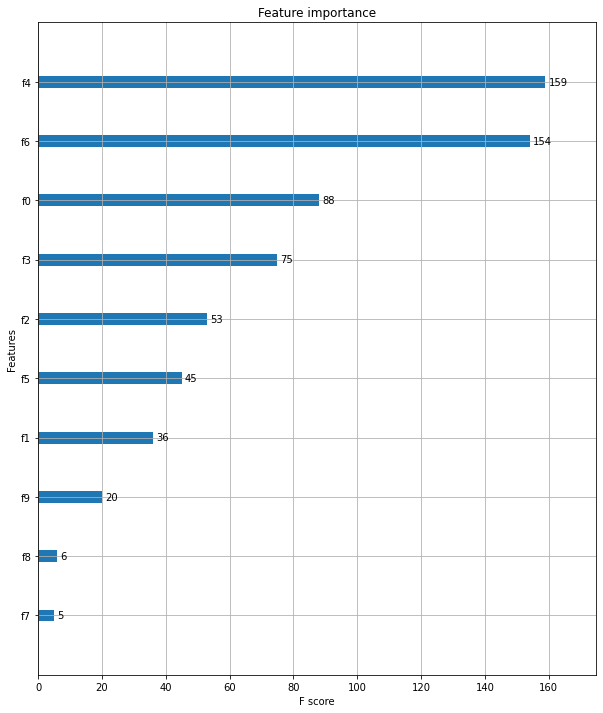

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_reg, ax=ax)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요. 

In [ ]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [ ]:
wine = load_wine()

wine_x = wine.data # x변수 
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

print(X_train.shape) 
print(y_train.shape) 

(124, 13)
(124,)


In [ ]:
y_train # 범주가 3개인 y값

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [ ]:
from sklearn.linear_model import LinearRegression

lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [ ]:
#절편
print('절편값: ', lr.intercept_)
print(lr.intercept_.shape)
# 3개인 이유: y의 범주형

절편값:  [-0.04177837  0.09551046 -0.05373209]
(3,)


In [ ]:
# 기울기
print('회귀계수값: ', np.round(lr.coef_, 1))
print(lr.coef_.shape)

회귀계수값:  [[-0.2  0.4  0.1 -0.2 -0.   0.2  0.5 -0.   0.1  0.1 -0.   0.3  0. ]
 [ 0.6 -0.8 -0.1  0.2 -0.   0.3  0.4  0.   0.3 -1.2  0.3  0.5 -0. ]
 [-0.4  0.4 -0.  -0.   0.  -0.5 -0.8 -0.  -0.4  1.1 -0.2 -0.8  0. ]]
(3, 13)


3-3) 모델의 정확도를 구하세요.

In [ ]:
#모델의 예측값 구하기
lr_preds = lr.predict(X_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))

accuracy : 0.963
